The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


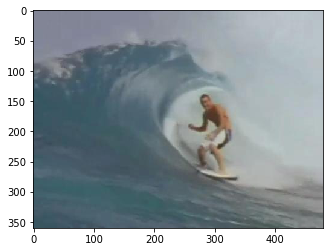

In [66]:
%load_ext autoreload
%autoreload 2

from sccf.SCCF import SCCF
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np


frame_path = './datasets/surfer/0001.jpg'
frame = mpimg.imread(frame_path)

plt.figure()
plt.imshow(frame)

74.5
149.5
[149 149 150 150]
(array([149, 149, 150, 150], dtype=int64), array([74, 75, 74, 75], dtype=int64))


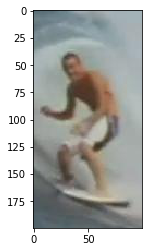

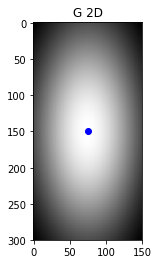

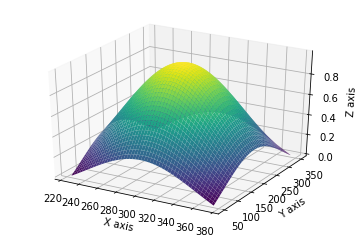

In [77]:
from image_utils import rgb2gray, pre_process, linear_mapping, window_func_2d, random_warp
n = 0.0 # Online learning rate parameter
l = 0.001#0.001 # gamma^2/v^2 where v - Controlling the prior variance of filter weight, gamma - 
num_training = 500
rotation = False

center_x = 300
center_y = 200
width = 100
height = 200

plt.figure()
plt.imshow(frame[int(center_y - height/2):int(center_y + height/2),
                int(center_x - width/2):int(center_x + width/2)])
plt.figure()
tracker = SCCF(center_x, center_y, width, height, n, l)
target_2D, target_2D_norm = tracker.initialize(frame)
#tracker.set_filter(target_2D_norm)
tracker.train_filter(target_2D, target_2D_norm, num_training, rotation)

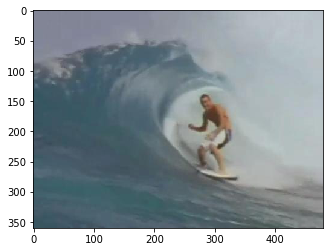

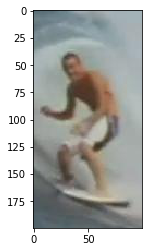

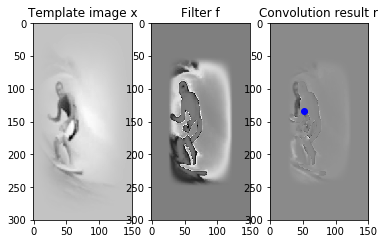

In [79]:
#%reload_ext autoreload
new_frame = frame.copy()
plt.figure()
plt.imshow(new_frame)

new_target_region = new_frame[int(center_y - height/2):int(center_y + height/2),
                              int(center_x - width/2):int(center_x + width/2)]
plt.figure()
plt.imshow(new_target_region)


tracker.test(new_frame)




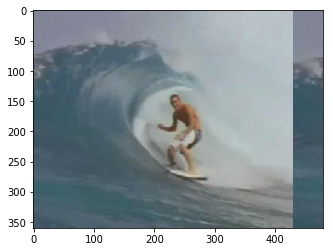

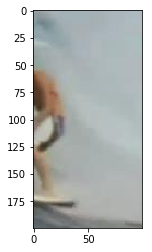

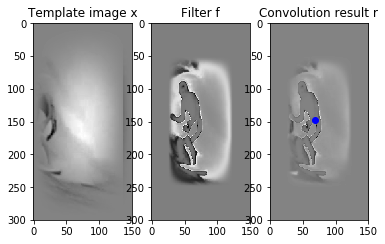

In [81]:
new_frame = np.roll(frame.copy(), -50, axis=1)
plt.figure()
plt.imshow(new_frame)

new_target_region = new_frame[int(center_y - height/2):int(center_y + height/2),
                              int(center_x - width/2):int(center_x + width/2)]
plt.figure()
plt.imshow(new_target_region)


tracker.test(new_frame)

